# NAME:Abdelrahman Sami                        
# ID:225256

# Image Classification with CNN (CIFAR-10)

This notebook implements a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset.

## CNN Architecture Overview
A CNN typically consists of **Convolutional Layers** (to extract features like edges and shapes), **Pooling Layers** (to reduce image size), and **Dense Layers** (for final classification).

![CNN Architecture](https://cdn-images-1.medium.com/max/1600/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)
*Figure: A typical CNN structure (Source: Medium)*



In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### 1. Load and Preprocess Data
We use the CIFAR-10 dataset, which contains 60,000 images in 10 classes.

In [6]:
print("Loading CIFAR-10 dataset...")

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


### 2. Build the CNN Model
We stack Conv2D and MaxPooling2D layers to extract features, followed by Dense layers for classification.

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### 3. Compile and Train
We use the Adam optimizer and Sparse Categorical Crossentropy loss.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Starting training...")
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Starting training...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3363 - loss: 1.7970 - val_accuracy: 0.5338 - val_loss: 1.2979
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.5614 - loss: 1.2406 - val_accuracy: 0.6008 - val_loss: 1.1343
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6323 - loss: 1.0517 - val_accuracy: 0.6039 - val_loss: 1.1028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6687 - loss: 0.9539 - val_accuracy: 0.6674 - val_loss: 0.9568
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6966 - loss: 0.8607 - val_accuracy: 0.6797 - val_loss: 0.9272
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7181 - loss: 0.8057 - val_accuracy: 0.6941 - val_loss: 0.8798
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7397 - loss: 0.7513 - val_accuracy: 0.6931 - val_loss: 0.8968
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step

### 4. Evaluate and Visualize Results
We plot the accuracy and loss over time to check for overfitting.

313/313 - 4s - 12ms/step - accuracy: 0.7050 - loss: 0.8762

Test accuracy: 70.50%


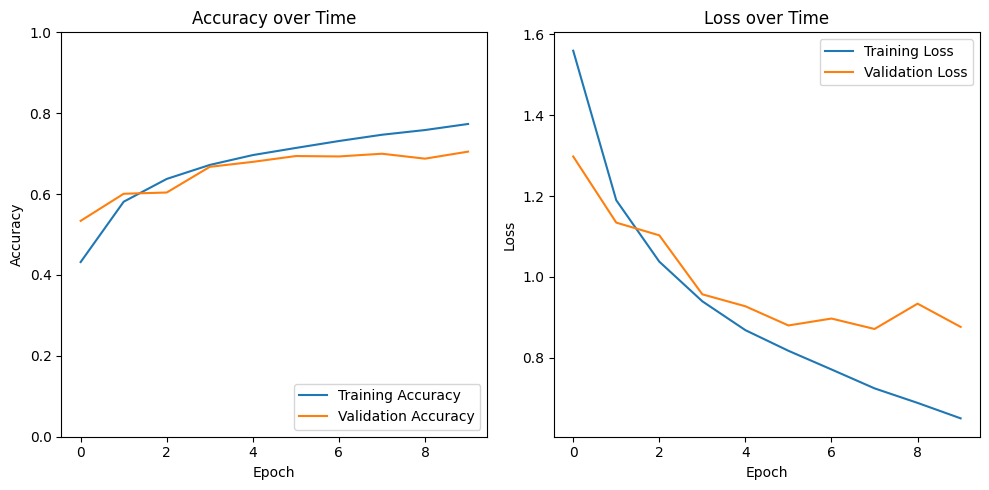

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy over Time')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Time')

plt.tight_layout()
plt.show()

### 5. Prediction Example
Let's test the model on a single image from the test set.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
True Label: cat
Predicted Label: cat


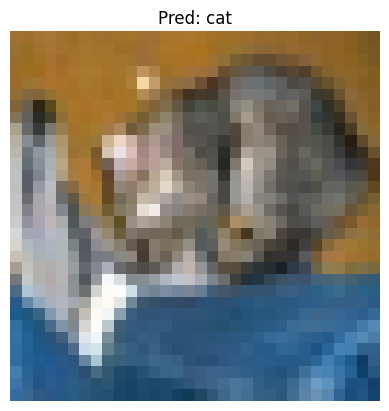

In [10]:
# Take the first image from the test set
test_img = test_images[0]
true_label = test_labels[0][0]

# Add batch dimension (32,32,3) -> (1,32,32,3)
img_batch = np.expand_dims(test_img, axis=0)

predictions = model.predict(img_batch)
predicted_label = np.argmax(predictions)

print(f"True Label: {class_names[true_label]}")
print(f"Predicted Label: {class_names[predicted_label]}")

plt.imshow(test_img)
plt.title(f"Pred: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

In [16]:
model.save('cifar10_cnn_model.keras')
print("Model saved successfully to cifar10_cnn_model.keras")

Model saved successfully to cifar10_cnn_model.keras


In [15]:
import os

# Show where the file was saved
print("Model saved in:", os.getcwd())

# Copy to Flask project
import shutil
source = 'cifar10_cnn_model.keras'
destination = r'D:\LEVEL_4\First_Term\Computational_Cognitive_system\sheets\Task_1\cifar10_cnn_model.keras'

shutil.copy(source, destination)
print(f"✅ Model copied to: {destination}")

Model saved in: /content
✅ Model copied to: D:\LEVEL_4\First_Term\Computational_Cognitive_system\sheets\Task_1\cifar10_cnn_model.keras
